In [31]:
import pandas as pd
import numpy as np
import os 
import statistics 
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.stats import ttest_rel
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
#import seaborn.objects as so

current_dir = os.getcwd()
alltaskdata = pd.read_csv('RejChoice_MasterData.csv')
taskdata = pd.read_csv('Taskdata_foranalysis.csv')
taskdata = taskdata.sort_values(by=['Prolific_id'])
selfreportdata = pd.read_csv('%s/scoring/selfreportdata_master.csv'%(current_dir))
correlationdataframe = pd.read_xlsx(updatedchoicedata.xlsx)

In [2]:
print(current_dir)

/Users/jordansiegel/Documents/GitHub/Rejection_Choice


In [5]:
print(selfreportdata)

                 PROLIFIC_ID         AQ       BRCS  ERQ_emosuppression  \
0   5a4636c92f91ec0001dcba07  32.000000  14.000000            4.250000   
1   5ad2c8334d061300011b1985  11.000000  18.000000            3.000000   
2   5adef850eb60400001539109  21.000000  15.000000            5.250000   
3   5d55d562e04e1c0001f5e682   7.000000  18.000000            1.000000   
4   5dcb685070d51c8275d7bd54   8.000000  17.000000            1.000000   
5   5dee8ee31255595293a9906b  14.000000  16.000000            3.500000   
6   5ec75df0d799ae1c11a8115c  28.000000  19.000000            6.000000   
7   5eefc651cb94ad4c4d017b86  17.000000  17.000000            1.500000   
8   5f16f559325a640008bb9a07  31.000000  13.000000            4.250000   
9   5f32bc368853aa03df112fc6  13.000000  17.000000            2.000000   
10  5ff27bb4ad8fba794c1b96fa  31.000000  16.000000            2.750000   
11  60bff9298f56d55c8ecd9adf  19.000000  15.000000            2.000000   
12  60dbf4d94a3b5564b68881e8  13.00000

In [6]:
photosharert = alltaskdata['sharenextphoto_keyrt']
photosharert = pd.DataFrame(photosharert).replace(np.nan, 0)
photosharert_mean = photosharert['sharenextphoto_keyrt'].mean()
photosharert_stdev = statistics.stdev(photosharert['sharenextphoto_keyrt'])
print(photosharert_mean)
print(photosharert_stdev)

lotteryrt = alltaskdata['resumeafterlottery_keysrt']
lotteryrt = pd.DataFrame(lotteryrt).replace(np.nan, 0)
lotteryrt_mean = lotteryrt['resumeafterlottery_keysrt'].mean()
lotteryrt_stdev =statistics.stdev(lotteryrt['resumeafterlottery_keysrt'])
print(lotteryrt_mean)
print(lotteryrt_stdev)

1.2767380790480258
10.430595867400488
0.35535080747981285
4.244383550885449


In [7]:
#find mean response time & stdev for choice across all participants
choicert = pd.DataFrame()
choicert = taskdata['choice_keysrt']
choicert = pd.DataFrame(choicert)
choicert['choice_keysrt'] = choicert['choice_keysrt'].replace(np.nan, 0)

choicert_mean = choicert['choice_keysrt'].mean()
print(choicert_mean)

choicert_stdev = statistics.stdev(choicert['choice_keysrt'])
print(choicert_stdev)

1.5162701234567892
0.7806952368572857


In [44]:
#self is set to 1, computer is set to 0

#overall proportion of times self was selected as a choice
choice = pd.DataFrame()
choice = taskdata['choiceresponse']
choice = pd.DataFrame(choice)
overallchoiceproportion = choice['choiceresponse'].mean()
overallchoice_std = choice['choiceresponse'].std()
print(overallchoiceproportion)
print(overallchoice_std)

0.4365079365079365
0.49628071119860356


In [12]:

#overall proportion of selecting self across conditions
#neutral = 0, rejection = 1, acceptance = 2
#make dataframe for calculation

choice['condition'] = taskdata['condition']
choice = pd.DataFrame(choice)
choice = choice.dropna()

#slice dataframe to include only rows where condition is neutral
neutralchoice = choice[choice['condition'] == 0]

#calculate mean on subsection of data
neutralchoice_mean = neutralchoice['choiceresponse'].mean()
neutralchoice_std = neutralchoice['choiceresponse'].std()
print('neutral_by_choice')
print(neutralchoice_mean)
print(neutralchoice_std)

#make subsection of dataframe
rejchoice = choice[choice['condition'] == 1]

#calculate mean on subsection of data
rejchoice_mean = rejchoice['choiceresponse'].mean()
rejchoice_std = rejchoice['choiceresponse'].std()
print('rej_by_choice')
print(rejchoice_mean)
print(rejchoice_std)

#generate new dataframe with acceptance condition only
acceptancechoice = choice[choice['condition'] == 2]

#calculate mean based on acceptance condition only data frame
acceptancechoice_mean = acceptancechoice['choiceresponse'].mean()
acceptancechoice_std = acceptancechoice['choiceresponse'].std() 
print('acc_by_choice')                
print(acceptancechoice_mean)
print(acceptancechoice_std)


neutral_by_choice
0.3881578947368421
0.48894185118942823
rej_by_choice
0.49337748344370863
0.5007859436443733
acc_by_choice
0.40397350993377484
0.4915067071259199


In [13]:
#salience levels by condition

salience = pd.DataFrame(taskdata['salience'])
salience['condition'] = taskdata['condition']

#slice dataframe to include only rows where condition is neutral
neutralsalience = salience[salience['condition'] == 0]

#calculate mean salience scoress across neutral condition
neutralsalience_mean = neutralsalience['salience'].mean()
neutralsalience_std = neutralsalience['salience'].std()
print('neutralsalience') 
print(neutralsalience_mean)
print(neutralsalience_std)

#slice dataframe to include only rows where condition is rejection
rejsalience = salience[salience['condition'] == 1]

#calculate mean salience scores across rejection condition
rejsalience_mean = rejsalience['salience'].mean()
rejsalience_std = rejsalience['salience'].std()
print('rejectionsalience')
print(rejsalience_mean)
print(rejsalience_std)

#slice dataframe to include only rows where condition is acceptance
accsalience = salience[salience['condition'] == 2]

#calculate mean salience scores across acceptance condition
accsalience_mean = accsalience['salience'].mean()
accsalience_std = accsalience['salience'].std()
print('accsalience')
print(accsalience_mean)
print(accsalience_std)

neutralsalience
2.3703703703703702
0.8257418188603314
rejectionsalience
1.962962962962963
0.8611957191808763
accsalience
3.1296296296296298
1.0024050885107814


In [14]:
stress = pd.DataFrame(taskdata['stress'])
stress['condition'] = taskdata['condition']

#slice dataframe to include only rows where condition is neutral
neutralstress = stress[stress['condition'] == 0]

#calculate mean for stress by neutral
neutralstress_mean = neutralstress['stress'].mean()
neutralstress_std = neutralstress['stress'].std()
print('neutralstress')
print(neutralstress_mean)
print(neutralstress_std)

#slice dataframe to include only rows where condition is rejection
rejstress = stress[stress['condition'] == 1]

#calculate mean for stress by rejection
rejstress_mean = rejstress['stress'].mean()
rejstress_std = rejstress['stress'].std()
print('rejstress')
print(rejstress_mean)
print(rejstress_std)
# print(rejstress_std)

#slice dataframe to include only rows where condition is acceptance
accstress = stress[stress['condition'] == 2]

#calculate mean for stress by acceptance
accstress_mean = accstress['stress'].mean()
accstress_std = accstress['stress'].std()
print('accstress')
print(accstress_mean)
print(accstress_std)

neutralstress
4.0
2.149678583514838
rejstress
4.0
2.280622369024052
accstress
3.6666666666666665
2.23121674728714


In [15]:
#paired samples t-test for condition by choice
t_stat, p_value = ttest_rel(rejchoice['choiceresponse'],acceptancechoice['choiceresponse'])
print("T-statistic value:", t_stat)
print('P-value:', p_value)

T-statistic value: 3.163856889959637
P-value: 0.0017160933281561777


In [16]:
#%% paired samples t-test for condition by salience

t_stat, p_value = ttest_rel(rejsalience['salience'],accsalience['salience'])
print("T-statistic value:", t_stat)
print('P-value:', p_value)

T-statistic value: -16.256467244537706
P-value: 7.715294045469519e-44


In [17]:
#paired samples t-test for condition by stress
t_stat, p_value = ttest_rel(rejstress['stress'],accstress['stress'])
print("T-statistic value:", t_stat)
print('P-value:', p_value)

T-statistic value: 3.483932699747145
P-value: 0.0005622708934060388


In [45]:
overallchoice = choice['choiceresponse']
prop_choicerej = rejchoice['condition']
prop_choiceacc = acceptancechoice['condition']
prop_choiceneu = neutralchoice['condition']
aq = selfreportdata.AQ #autism quotient
BRCS = selfreportdata.BRCS #brief resilience coping scale
ERQ_emosuppression = selfreportdata.ERQ_emosuppression #ERQ emotional suppression
ERQ_cogreappraisal = selfreportdata.ERQ_cogreappraisal #ERQ cognitive reappraisal
mspss = selfreportdata.MSPSS #perceived social support
ntbs = selfreportdata.NTBS #need to belong scale
pss = selfreportdata.PSS #perceived stress scale
rsq = selfreportdata.RSQ #rejection sensitivty questionnaire
scs = selfreportdata.SCS #social connectedness scale
rr = selfreportdata.RR #reward responsiveness
lsas = selfreportdata.LSAS_total #social anxiety scale total
DII_functional = selfreportdata.DII_functionalimpulsivity
DII_dysfunctional = selfreportdata.DII_dysfunctionalimpulsivity
dast = selfreportdata.DAST #drug abuse screening test
SRQ_admiration = selfreportdata.SRQ_admiration #social reward subscale
SRQ_negsocpot = selfreportdata.SRQ_negsocpot # social reward subscale
SRQ_prosocint = selfreportdata.SRQ_prosocint # social reward subscale
SRQ_sexrel = selfreportdata.SRQ_sexrel # social reward subscale
SRQ_sociability = selfreportdata.SRQ_sociability # social reward subscale


ValueError: x and y must be the same size

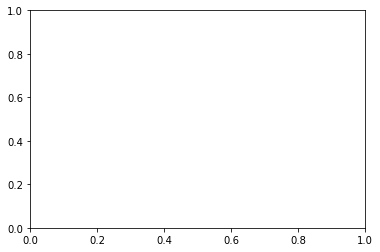

In [51]:
# rejchoice // aq
plt.scatter(rejchoice['choiceresponse'], aq)
plt.show()
covariance = cov(rejchoice['choiceresponse'], aq)
print(covariance)
corr, _ = pearsonr(rejchoice['choiceresponse'], aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(rejchoice['choiceresponse'], aq)
print('p value: %.4f' % p)

In [49]:
print(rejchoice)

     choiceresponse  condition
464             0.0          1
64              0.0          1
63              0.0          1
62              1.0          1
61              0.0          1
..              ...        ...
672             1.0          1
666             0.0          1
673             0.0          1
675             1.0          1
674             1.0          1

[302 rows x 2 columns]
